In [1]:
# test the fitting:
# RT rmse on RT score, hard bound = False

In [2]:
import pickle
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from optimization_utils import param_vec_to_dict, make_boundary
import scipy.optimize as opt
import scipy.stats as st

In [3]:
folder = "0916_RTscore_150_100/"

In [4]:
file_list = glob.glob(folder + "outfiles/*data*.pkl")
file_list = [i.replace(folder + "outfiles/","") for i in file_list]
file_list = [i.replace(".pkl","") for i in file_list]
file_list = [tuple(map(int,i.split("data"))) for i in file_list]
file_list.sort()
# file_list

In [5]:
pso_df = pd.DataFrame(columns = ['iter','particle','err'])
_, _, what_to_fit = make_boundary()

for iter, p in file_list:
    path = folder + "outfiles/" + str(iter) + "data" + str(p) + ".pkl" 
    with open(path, 'rb') as inp:
        data = pickle.load(inp)
    if len(data) != 0:
        err = data['err']
        params = data['params']
        row_dict = {"iter":iter,"particle":p,"err":err}
        row_dict.update({what_to_fit[i]:params[i] for i in range(len(params))})
        pso_df = pso_df.append(row_dict,ignore_index=True)
    
pso_df

,iter,particle,err,beta_enc,beta_rec,beta_rec_post,gamma_fc,s_fc
0,1.0,0.0,0.768819,0.338250,0.776374,0.527847,0.912741,0.984691
1,1.0,1.0,0.766496,0.482503,0.120003,0.444709,0.553146,0.463092
2,1.0,2.0,0.768053,0.362699,0.447746,0.399051,0.952197,0.677403
3,1.0,3.0,0.769141,0.481173,0.848373,0.628098,0.542687,0.829030
4,1.0,4.0,0.768252,0.723715,0.402577,0.173746,0.828523,0.647411
...,...,...,...,...,...,...,...,...
8613,150.0,94.0,0.094633,0.186383,0.527452,0.153066,0.726177,0.010000
8614,150.0,96.0,0.094633,0.186357,0.528032,0.153098,0.725619,0.010000
8615,150.0,97.0,0.094628,0.185984,0.524207,0.153136,0.725816,0.010000
8616,150.0,98.0,0.094633,0.185024,0.527071,0.153283,0.726250,0.010006


In [6]:
pso_df.loc[pso_df.iter == 150]

,iter,particle,err,beta_enc,beta_rec,beta_rec_post,gamma_fc,s_fc
8547,150.0,1.0,0.094638,0.185952,0.523110,0.153086,0.726147,0.010001
8548,150.0,3.0,0.094629,0.186069,0.527484,0.153192,0.726035,0.010000
8549,150.0,4.0,0.094639,0.186340,0.526889,0.153387,0.726117,0.010002
8550,150.0,5.0,0.094631,0.185889,0.534293,0.152797,0.726055,0.010001
8551,150.0,8.0,0.094634,0.186050,0.533890,0.153204,0.725607,0.010004
...,...,...,...,...,...,...,...,...
8613,150.0,94.0,0.094633,0.186383,0.527452,0.153066,0.726177,0.010000
8614,150.0,96.0,0.094633,0.186357,0.528032,0.153098,0.725619,0.010000
8615,150.0,97.0,0.094628,0.185984,0.524207,0.153136,0.725816,0.010000
8616,150.0,98.0,0.094633,0.185024,0.527071,0.153283,0.726250,0.010006


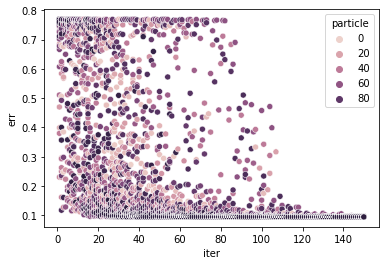

In [7]:
sns.scatterplot(data=pso_df, x="iter", y="err", hue="particle")
plt.show()

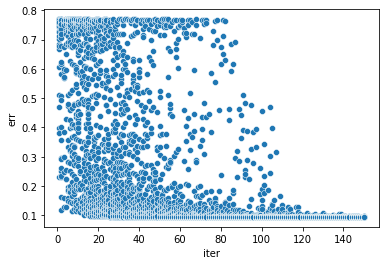

In [8]:
sns.scatterplot(data=pso_df, x="iter", y="err")
plt.show()

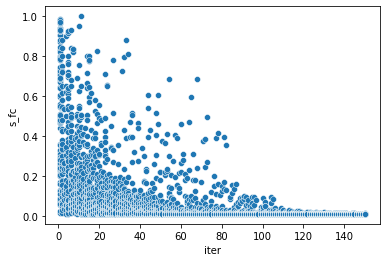

In [44]:
sns.scatterplot(data=pso_df, x="iter", y="s_fc")
plt.show()

In [10]:
param_vec = np.loadtxt('/home1/beigejin/MyCMR2/Modeling/CMR2/fitting/' + folder + 'outfiles/xoptb.txt')
prams = param_vec_to_dict(param_vec)
prams

{'beta_enc': 0.186193,
 'beta_rec': 0.527446,
 'beta_rec_post': 0.153049,
 'beta_distract': None,
 'phi_s': 2,
 'phi_d': 0.5,
 's_cf': 0,
 's_fc': 0.01,
 'kappa': 0.5,
 'eta': 0.5,
 'omega': 8,
 'alpha': 4,
 'c_thresh': 0.4,
 'lamb': 0.5,
 'rec_time_limit': 60000.0,
 'dt': 10,
 'nitems_in_accumulator': 50,
 'max_recalls': 50,
 'learn_while_retrieving': False,
 'a': 2800,
 'b': 20,
 'gamma_fc': 0.726041,
 'gamma_cf': 0.5}

In [11]:
# prams.update({i:test[i].item() for i in what_to_fit})
# prams

### Run CMR2 on the Best Params

In [12]:
import CMR2_jbg as cmr
pd.set_option('display.max_columns', None)
np.set_printoptions(edgeitems=20, linewidth=200,precision=4)

In [14]:
# import recognition dataframe
with open("/home1/beigejin/Recog_David/data_als/data_df_clean.pkl", 'rb') as inp:
    df = pickle.load(inp)
df

,rt,subject_ID,item,lag,category,confidence,category_label,position,old,yes,curr_cat_length,curr_cat_label_length,itemno,session
57307,1514.875,0,CHICKEN,0,Uncategorized,1.0,FarmAnimals,0,False,0,NaN,0,53,0
57766,853.505,0,BLUEBERRY,0,Uncategorized,1.0,Fruit,1,False,0,NaN,0,26,0
58224,731.040,0,BUS,0,Uncategorized,1.0,Vehicles,2,False,0,NaN,0,33,0
58695,848.955,0,LEMON,0,Uncategorized,1.0,Fruit,3,False,0,NaN,1,151,0
59159,643.880,0,OYSTER,0,Uncategorized,1.0,OceanAnimals,4,False,0,NaN,0,187,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337333,1911.000,656,COLA,37,Beverages,2.0,Beverages,575,True,0,18.0,18,60,350
337508,2358.000,656,BASEBALL,115,Toys,8.0,Toys,576,True,1,23.0,23,10,350
337682,1239.000,656,TEA,24,Beverages,8.0,Beverages,577,True,1,19.0,19,265,350
337870,1567.000,656,RADIO,41,Uncategorized-Singleton,2.0,Electronics,578,True,0,NaN,23,213,350


In [15]:
s_mat = np.load('/home1/beigejin/Recog_David/data_als/semantic_mat_fasttext.npy')

In [16]:
df_simu = cmr.run_continuous_recog_multi_sess(prams,df,s_mat)
df_simu

CMR Time: 154.5221049785614


,session,position,itemno,s_resp,s_rt,csim
57307,0,0,53,0.0,0.939295,0.000000
57766,0,1,26,0.0,0.985853,0.002419
58224,0,2,33,0.0,1.006925,0.003476
58695,0,3,151,0.0,1.078113,0.006892
59159,0,4,187,0.0,1.107561,0.008239
...,...,...,...,...,...,...
337333,350,575,60,1.0,1.162554,0.789338
337508,350,576,10,1.0,0.734346,0.812307
337682,350,577,265,1.0,0.366051,0.847118
337870,350,578,213,1.0,0.534175,0.828220


In [61]:
df_new = df_simu.merge(df,on=['session','position','itemno'])
df_new

,session,position,itemno,s_resp,s_rt,csim,rt,subject_ID,item,lag,category,confidence,category_label,old,yes,curr_cat_length,curr_cat_label_length
0,0,0,53,0.0,0.939295,0.000000,1514.875,0,CHICKEN,0,Uncategorized,1.0,FarmAnimals,False,0,NaN,0
1,0,1,26,0.0,0.985853,0.002419,853.505,0,BLUEBERRY,0,Uncategorized,1.0,Fruit,False,0,NaN,0
2,0,2,33,0.0,1.006925,0.003476,731.040,0,BUS,0,Uncategorized,1.0,Vehicles,False,0,NaN,0
3,0,3,151,0.0,1.078113,0.006892,848.955,0,LEMON,0,Uncategorized,1.0,Fruit,False,0,NaN,1
4,0,4,187,0.0,1.107561,0.008239,643.880,0,OYSTER,0,Uncategorized,1.0,OceanAnimals,False,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203575,350,575,60,1.0,1.162554,0.789338,1911.000,656,COLA,37,Beverages,2.0,Beverages,True,0,18.0,18
203576,350,576,10,1.0,0.734346,0.812307,2358.000,656,BASEBALL,115,Toys,8.0,Toys,True,1,23.0,23
203577,350,577,265,1.0,0.366051,0.847118,1239.000,656,TEA,24,Beverages,8.0,Beverages,True,1,19.0,19
203578,350,578,213,1.0,0.534175,0.828220,1567.000,656,RADIO,41,Uncategorized-Singleton,2.0,Electronics,True,0,NaN,23


## RT Analysis

In [62]:
def loftus_masson(df, sub_cols, cond_col, value_col, within_cols=[]):
    
    if not isinstance(sub_cols, list):
        sub_cols = [sub_cols]
    if not isinstance(within_cols, list):
        within_cols = [within_cols]
    df = df.copy()
    if len(within_cols) > 0:
        df['M'] = df.groupby(within_cols)[value_col].transform('mean')
    else:
        df['M'] = df[value_col].mean()
    df['M_S'] = df.groupby(sub_cols + within_cols)[value_col].transform('mean')
    df['adj_' + value_col] = (df[value_col] + df['M'] - df['M_S'])
    
    return df

In [63]:
df_new = df_new.loc[(df_new.rt < 3000) & (df_new.rt > 400)&(df_new.position > 10)&(df_new.old == df_new.yes)]
df_new = loftus_masson(df_new, 'subject_ID', [], 'rt')
df_new

,session,position,itemno,s_resp,s_rt,csim,rt,subject_ID,item,lag,category,confidence,category_label,old,yes,curr_cat_length,curr_cat_label_length,M,M_S,adj_rt
11,0,11,246,0.0,1.473998,0.022530,582.095,0,SPARROW,0,Birds,1.0,Birds,False,0,5.0,5,1275.22641,1394.877643,462.443767
12,0,12,41,0.0,1.313574,0.016769,680.490,0,CARDINAL,0,Birds,1.0,Birds,False,0,6.0,6,1275.22641,1394.877643,560.838767
13,0,13,89,0.0,1.384253,0.019389,892.380,0,DRUM,0,Uncategorized,1.0,Instruments,False,0,NaN,0,1275.22641,1394.877643,772.728767
14,0,14,62,0.0,1.386859,0.019483,912.085,0,COMPUTER,0,Uncategorized,1.0,Electronics,False,0,NaN,0,1275.22641,1394.877643,792.433767
15,0,15,274,0.0,1.453819,0.021841,1030.440,0,TRAIN,0,Uncategorized-Singleton,1.0,Vehicles,False,0,NaN,1,1275.22641,1394.877643,910.788767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203572,350,572,291,1.0,0.474906,0.834101,1522.000,656,WATER,29,Beverages,8.0,Beverages,True,1,17.0,17,1275.22641,1407.889849,1389.336562
203573,350,573,84,1.0,0.408763,0.841600,1545.000,656,DOVE,84,Birds,8.0,Birds,True,1,21.0,21,1275.22641,1407.889849,1412.336562
203576,350,576,10,1.0,0.734346,0.812307,2358.000,656,BASEBALL,115,Toys,8.0,Toys,True,1,23.0,23,1275.22641,1407.889849,2225.336562
203577,350,577,265,1.0,0.366051,0.847118,1239.000,656,TEA,24,Beverages,8.0,Beverages,True,1,19.0,19,1275.22641,1407.889849,1106.336561


In [66]:
a = 2800
c_thresh = 0.4
import statsmodels.formula.api as smf

In [67]:
df_new['csim_diff'] = df_new['csim'] - c_thresh
df_new['csim_score'] = np.power(-1, df_new['yes']) * (np.log(df_new.adj_rt) - np.log(a)) 
df_new.csim_score = df_new.csim_score.astype("float")
mod = smf.ols(formula='csim_score ~ -1 + csim_diff', data=df_new)
res = mod.fit()
mse = res.mse_resid
mse

/home1/beigejin/.conda/envs/jinbeige/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.0946240539327555

In [68]:
b = res.params[0]
b

2.1412684396225954

In [70]:
df_new['s_score'] = b * df_new['csim_diff']
# df_new['s_rt'] = np.exp(df_new['s_score'] * np.power(-1, df_new['yes']) + np.log(a))
df_new['s_rt'] = a * np.exp(-1 * b * np.abs(df_new.csim - c_thresh))

In [71]:
df_old = df_new.loc[df_new.lag > 0]
df_old

,session,position,itemno,s_resp,s_rt,csim,rt,subject_ID,item,lag,category,confidence,category_label,old,yes,curr_cat_length,curr_cat_label_length,M,M_S,adj_rt,csim_diff,csim_score,s_score
23,0,23,71,1.0,2597.931965,0.434981,1116.505,0,CROW,15,Birds,8.0,Birds,True,1,7.0,7,1275.22641,1394.877643,996.853767,0.034981,1.032771,0.074904
25,0,25,38,1.0,1038.064007,0.863399,827.260,0,CALCULATOR,1,Uncategorized-Singleton,8.0,Electronics,True,1,NaN,2,1275.22641,1394.877643,707.608767,0.463399,1.375483,0.992262
26,0,26,33,1.0,2613.724844,0.432151,1204.710,0,BUS,24,Uncategorized,8.0,Vehicles,True,1,NaN,2,1275.22641,1394.877643,1085.058767,0.032151,0.947985,0.068843
34,0,34,115,1.0,2082.040211,0.538362,1290.270,0,GIRAFFE,29,Uncategorized,8.0,Zoo,True,1,NaN,2,1275.22641,1394.877643,1170.618767,0.138362,0.872087,0.296271
35,0,35,187,1.0,1530.653221,0.682041,806.505,0,OYSTER,31,Uncategorized,8.0,OceanAnimals,True,1,NaN,2,1275.22641,1394.877643,686.853767,0.282041,1.405253,0.603925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203572,350,572,291,1.0,1105.274109,0.834101,1522.000,656,WATER,29,Beverages,8.0,Beverages,True,1,17.0,17,1275.22641,1407.889849,1389.336562,0.434101,0.700793,0.929526
203573,350,573,84,1.0,1087.667952,0.841600,1545.000,656,DOVE,84,Birds,8.0,Birds,True,1,21.0,21,1275.22641,1407.889849,1412.336562,0.441600,0.684374,0.945584
203576,350,576,10,1.0,1158.074172,0.812307,2358.000,656,BASEBALL,115,Toys,8.0,Toys,True,1,23.0,23,1275.22641,1407.889849,2225.336562,0.412307,0.229711,0.882861
203577,350,577,265,1.0,1074.891759,0.847118,1239.000,656,TEA,24,Beverages,8.0,Beverages,True,1,19.0,19,1275.22641,1407.889849,1106.336561,0.447118,0.928565,0.957399


In [50]:
# import sys
# sys.path.insert(0, '/home1/beigejin/CMR2GUI')
# from output_utils import *
# df_new = preproc(df_new)

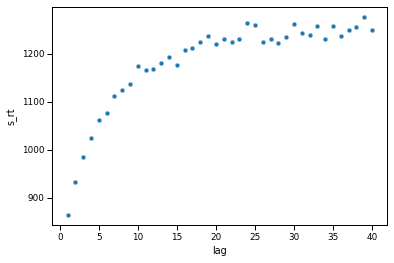

In [86]:
df_laggp = df_old.groupby('lag').s_rt.mean().to_frame(name='rt_mean').reset_index()
df_laggp.lag = df_laggp.lag.astype('int')
df_laggp = df_laggp.loc[df_laggp.lag <= 40]
# df_laggp = df_laggp.loc[df_laggp.lag.isin([1,2,4,8,16,32,40])]
sns.scatterplot(data=df_laggp, y='rt_mean', x='lag')
plt.xlabel('lag')
plt.ylabel('s_rt')
plt.show()

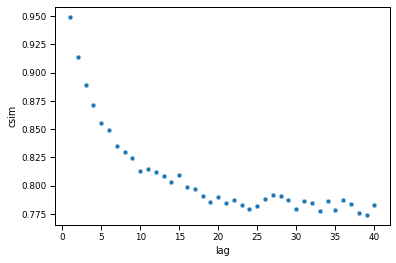

In [83]:
df_laggp = df_old.groupby('lag').csim.mean().to_frame(name='rt_mean').reset_index()
df_laggp.lag = df_laggp.lag.astype('int')
df_laggp = df_laggp.loc[df_laggp.lag <= 40]
# df_laggp = df_laggp.loc[df_laggp.lag.isin([1,2,4,8,16,32,40])]
sns.scatterplot(data=df_laggp, y='rt_mean', x='lag')
plt.xlabel('lag')
plt.ylabel('csim')
plt.show()

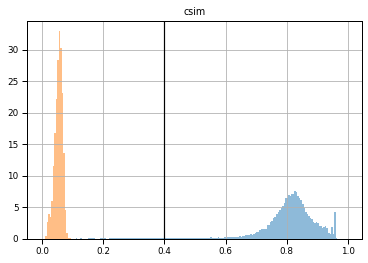

In [77]:
bin_arr = np.arange(0,1,0.005)
df_tar = df_new.loc[df_new.old == True]
df_lure = df_new.loc[df_new.old == False]

fig, ax = plt.subplots()
df_tar.hist(column = 'csim', bins=bin_arr, ax = ax, density = True,alpha=0.5)
df_lure.hist(column = 'csim', bins=bin_arr, ax = ax, density = True, alpha=0.5)
plt.axvline(prams["c_thresh"], color = 'k')
plt.show()

array([[<AxesSubplot:title={'center':'csim_score'}>]], dtype=object)

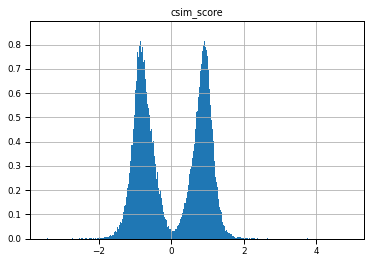

In [85]:
df_new.hist(column = 'csim_score', bins=1000,cumulative=False, density=1)

array([[<AxesSubplot:title={'center':'s_rt'}>]], dtype=object)

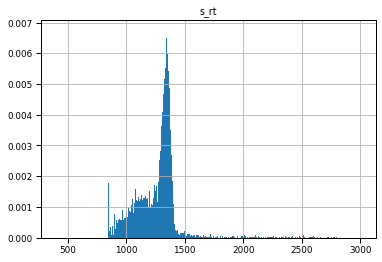

In [78]:
df_new.hist(column = 's_rt', bins=np.arange(400,3000), cumulative=False, density=1)

array([[<AxesSubplot:title={'center':'rt'}>]], dtype=object)

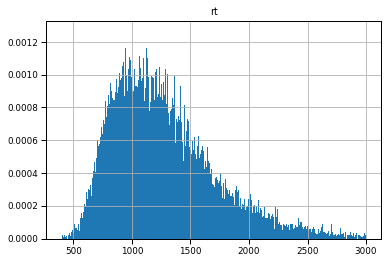

In [79]:
df_new.hist(column = 'rt', bins=np.arange(400,3000), cumulative=False, density=1)

(-2.0, 2.0)

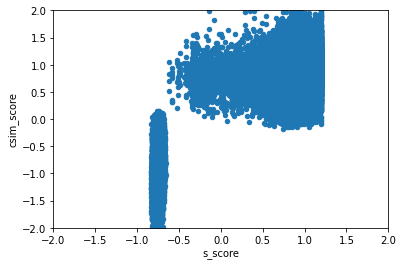

In [46]:
df_new.plot.scatter(x = 's_score', y = 'csim_score')
plt.xlim([-2,2])
plt.ylim([-2,2])

<AxesSubplot:xlabel='s_rt', ylabel='rt'>

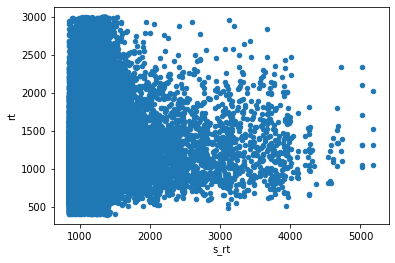

In [38]:
df_new.plot.scatter(x = 's_rt', y = 'rt')

In [80]:
f = folder.rstrip("/")

In [81]:
with open('/home1/beigejin/Recog_David/data_als/data_df_simu_' + f + '.pkl', 'wb') as outp:
    pickle.dump(df_new, outp, pickle.HIGHEST_PROTOCOL)